## Цель работы
Основной целью работы является освоение специализированных пакетов для решения
задач в непрерывном и дискретном времени.

##  Предварительные сведения

## Решение обыкновенных дифференциальных уравнений
Напомним, что обыкновенное дифференциальное уравнение (ОДУ) описывает изменение некоторой переменной $u'$:
$$\large{u'(t)=f(u(t), p, t),}$$

где $f(u(t), p, t)$ — нелинейная модель (функция) изменения $u(t)$ с заданным начальнымзначением $u(t_{0}) = u_{0}$, $p$ — параметры модели, $t$ — время.

Для решения обыкновенных дифференциальных уравнений (ОДУ) в Julia можно использовать пакет ```diffrentialEquations.jl```.

## Модель экспоненциального роста

Рассмотрим пример использования этого пакета для решение уравнения модели экспоненциального роста, описываемую уравнением
$$ \large{u'(t) = au(t), u(0) = u_{0}}. $$ где $a$ - коэффицент роста.

Предположим, что заданы следующие начальные данные $a = 0, 98, u(0) = 1, 0, t ∈ [0; 1]$.

Аналитическое решение модели имеет вид:
$$\large{u(t) = u_{0}exp(at)u(t)}.$$
Численное решение в Julia будет иметь следующий вид:

In [2]:
# Подключить необходимые пакеты:
using DifferentialEquations


In [3]:
# задаем описание модели с начальными условиями:
a = 0.98
f(u,p,t) = a*u
u0 = 1.0
# Задаем интервал времени:
tspan = (0.0,1.0)

#решение
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)


retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436028208104
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384275623003
 2.664456142481452

Построение графика, соответствующего полученному решению:


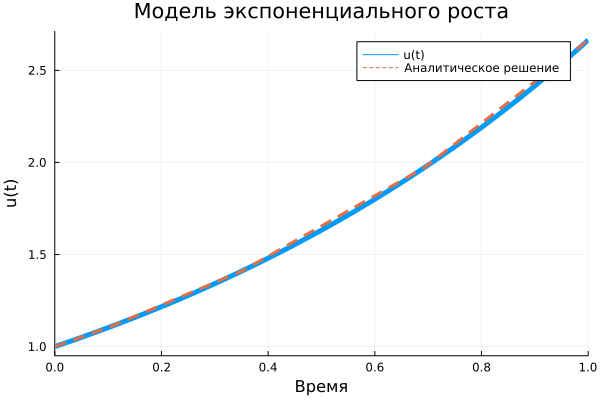

In [7]:
# строим графики:
using Plots
plot(sol, linewidth=5,title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="u(t)")
plot!(sol.t, t->1.0*exp(a*t),lw=3,ls=:dash,label="Аналитическое решение")

При построении одного из графиков использовался вызов ```sol.t```, чтобы захватить
массив моментов времени. Массив решений можно получить, воспользовавшись ```sol.u```.

Если требуется задать точность решения, то можно воспользоваться параметрами
```abstol``` (задаёт близость к нулю) и ```reltol``` (задаёт относительную точность). По умолчанию эти параметры имеют значение ```abstol = 1e-6``` и ```reltol = 1e-3```.

Для модели экспоненциального роста:

OrdinaryDiffEq.ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Float64}}, ODEProblem{Float64, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, ODEFunction{false, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Base.Iterators.Pairs{Union{}, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, CompositeAlgorithm{Tuple{Vern7, Rodas4{0, false, DefaultLinSolve, Val{:forward}}}, OrdinaryDiffEq.AutoSwitchCache{Vern7, Rodas4{0, false, DefaultLinSolve, Val{:forward}}, Rational{Int64}, Int64}}, OrdinaryDiffEq.CompositeInterpolationData{ODEFunction{false, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Vector{Float6

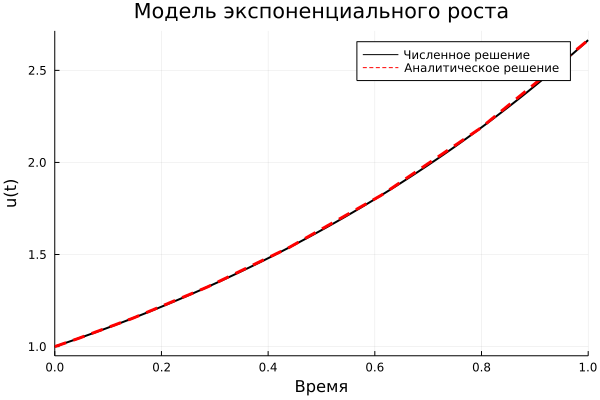

In [8]:
# задаем точность решения:
sol = solve(prob,abstol=1e-8,reltol=1e-8)
println(sol)

# строим график:
plot(sol, lw=2, color="black", title="Модель экспоненциального роста", xaxis="Время",yaxis="u(t)",label="Численное решение")
plot!(sol.t,t->1.0*exp(a*t),lw=3,ls=:dash,color="red",label="Аналитическое решение")

## Система Лоренца
Динамической системой Лоренца является нелинейная автономная система обыкновенных дифференциальных уравнений третьего порядка:

$$ \large{\begin{cases}
\dot{x} = \sigma (y - x), \\ 
\dot{y} = \rho x -y - xz, \\ 
\dot{z} = xy - \beta z, 
\end{cases}} $$

где $\sigma$, $\rho$ и $\beta$ — параметры системы (некоторые положительные числа, обычно указывают $\sigma = 10, \rho = 28, \beta = 8/3$).

Система получена из системы уравнений Навье–Стокса и описывает движение
воздушных потоков в плоском слое жидкости постоянной толщины при разложении
скорости течения и температуры в двойные ряды Фурье с последующем усечением до
первых-вторых гармоник.

Решение системы неустойчиво на аттракторе, что не позволяет применять классические численные методы на больших отрезках времени, требуется использовать
высокоточные вычисления.

Численное решение в Julia будет иметь следующий вид:

In [9]:
using DifferentialEquations, Plots;

# задаем описание модели:

function lorenz!(du,u,p,t)
σ,ρ,β = p
du[1] = σ*(u[2]-u[1])
du[2] = u[1]*(ρ-u[3]) - u[2]
du[3] = u[1]*u[2] - β*u[3]
end
# задаем начальное условие:
u0 = [1.0,0.0,0.0]

# задаем значения параметров:
p = (10,28,8/3)

# задаем интервал времени:
tspan = (0.0,100.0)

# Решение:
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)


retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1300-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.003262408518896374
   0.009058077168386882
   0.01695647153663815
   0.027689960628879868
   0.041856351821061455
   0.06024041060823337
   0.08368540639551347
   0.11336498387118026
   0.14862180073662978
   0.18703976749175058
   ⋮
  98.96497153541497
  99.06972158785038
  99.15733553336672
  99.25227436435598
  99.34990050231407
  99.47329750836677
  99.56888278883171
  99.68067056500875
  99.7698930548574
  99.86396908592394
  99.9520070464327
 100.0
u: 1300-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591566959717, 0.089770627357676, 0.0001438019004555601]
 [0.9242043510496474, 0.24228916412927515, 0.0010461626

Фазовый портрет:

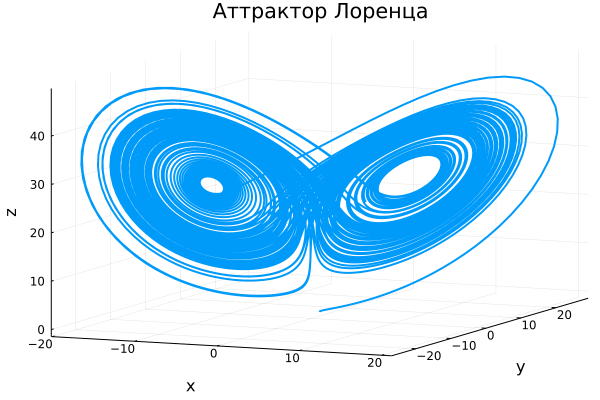

In [10]:
# Строим график:
plot(sol, vars=(1,2,3), lw=2, title="Аттрактор Лоренца", xaxis="x",yaxis="y", zaxis="z",legend=false)


Можно отключить интерполяцию:

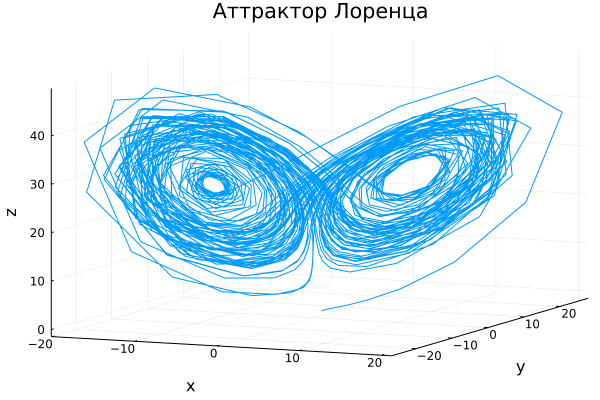

In [11]:
# Отключаем интерполяцию:
plot(sol,vars=(1,2,3),denseplot=false, lw=1, title="Аттрактор Лоренца",xaxis="x",yaxis="y", zaxis="z",legend=false)

##  Модель Лотки–Вольтерры
Модель Лотки–Вольтерры описывает взаимодействие двух видов типа «хищник – жертва»:
$$\large{\begin{cases} \dot{x} = (\alpha -\beta)x,  \\ \dot{y} = (-\gamma + \delta x)y, \end{cases}}$$

где $x$ — количество жертв, $y$ — количество хищников, $t$ — время, $\alpha, \beta, \gamma, \delta$ — коэффициенты, отражающие взаимодействия между видами (в данном случае $\alpha$ — коэффициент
рождаемости жертв, $\gamma$ — коэффициент убыли хищников, $\beta$ — коэффициент убыли жертв
в результате взаимодействия с хищниками, $\delta$ — коэффициент роста численности хищников).

Численное решение в Julia будет иметь следующий вид:

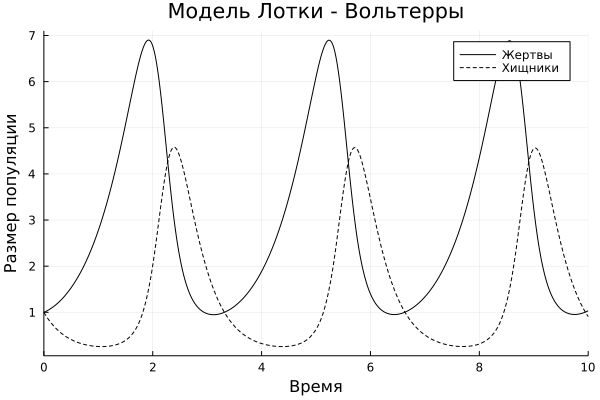

In [13]:
using ParameterizedFunctions, DifferentialEquations, Plots;

# задаем описание модели:
lv! = @ode_def LotkaVolterra begin
dx = a*x - b*x*y
dy = -c*y + d*x*y
end a b c d

# задаем начальное условие:
u0 = [1.0,1.0]

# задаем значения параметров:
p = (1.5,1.0,3.0,1.0)

# Задаем интервал времени:
tspan = (0.0,10.0)

# Решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)
plot(sol, label = ["Жертвы" "Хищники"], color="black", ls=[:solid :dash], title="Модель Лотки - Вольтерры",xaxis="Время",yaxis="Размер популяции")


Фазовый портрет:

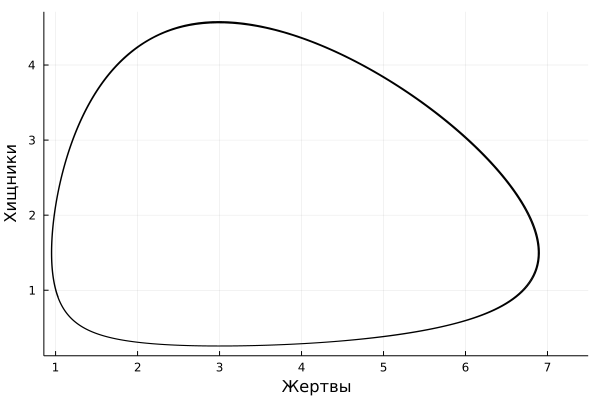

In [14]:
# Фазовый портрет:
plot(sol,vars=(1,2), color="black", xaxis="Жертвы",yaxis="Хищники", legend=false)

# Задания для самостоятельного выполнения

1. Реализовать и проанализировать модель роста численности изолированной популяции (модель Мальтуса): $$ \large{\dot{x} = ax, a = b - c.}$$ где $x(t)$ — численность изолированной популяции в момент времени $t, a$ — коэффициент роста популяции, $b$ — коэффициент рождаемости, $c$ — коэффициент смертности. Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией).

In [25]:
# начальные условия
b = 0.95
c = 0.15
a = b - c
f(x,p,t) = a*x
x0 = 15.0

#интервал времени
tspan = (0.0,8.0)

#решение 
prob = ODEProblem(f,x0,tspan)
solution = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 13-element Vector{Float64}:
 0.0
 0.10456534940802063
 0.3974305810260746
 0.808016674370337
 1.3005512012183194
 1.8973588420302545
 2.5833503869542658
 3.359268997466079
 4.215664632082925
 5.146543447329325
 6.1438305590678475
 7.200379260707909
 8.0
u: 13-element Vector{Float64}:
   15.0
   16.308761530929193
   20.614499044592435
   28.630240453781468
   42.456967819414636
   68.43858214864302
  118.4781799208997
  220.40371343609254
  437.2792248903106
  920.8206919976978
 2044.8498753973356
 4761.395508992367
 9027.125370098694

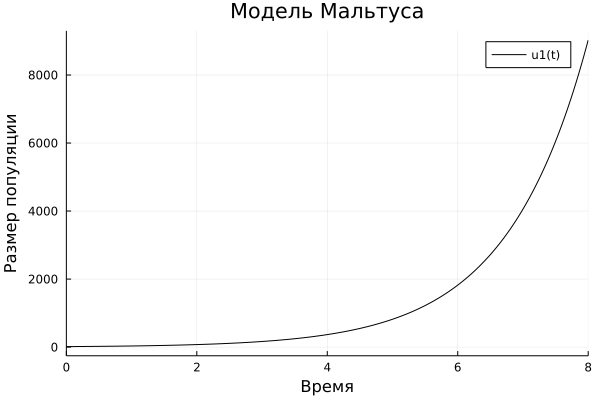

In [29]:

plot(solution, color="black", ls = [:solid :dash], title="Модель Мальтуса",
xaxis="Время",yaxis="Размер популяции")


In [38]:
n = 8.0
maxy = maximum(solution.u)

9027.125370098694

┌ Info: Saved animation to 
│   fn = C:\Users\khokh\Desktop\2021-2022\COMPRACT\malthus.gif
└ @ Plots C:\Users\khokh\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\khokh\\Desktop\\2021-2022\\COMPRACT\\malthus.gif")
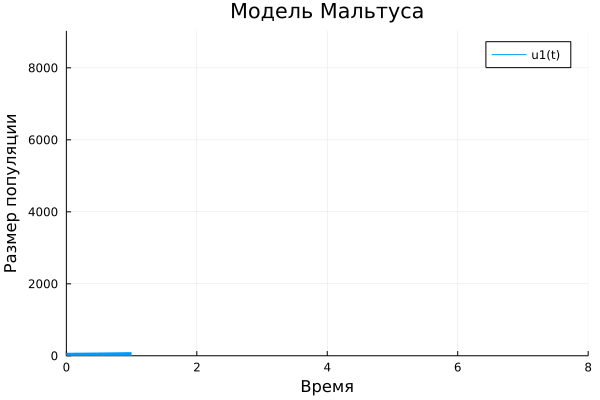

In [39]:
#анимация графика
animation = @animate for i in 1:0.1:n
    tspan = (0.0,i)
    
    prob = ODEProblem(f,x0, tspan)
    solution = solve(prob)
    
    plot(solution, linewidth = 5,
         title="Модель Мальтуса",
         xaxis="Время",
         yaxis="Размер популяции",
         xlims = (0, n),
         ylims = (0, maxy)
    )
end

gif(animation, "malthus.gif")

2. Реализовать и проанализировать логистическую модель роста популяции, заданную уравнением:
̇$$\large{\dot{x} = rx(1 - \frac{x}{k}) , r > 0, k > 0,}$$
$r$ — коэффициент роста популяции, $k$ — потенциальная ёмкость экологической системы (предельное значение численности популяции). Начальные данные и параметры
задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией).

In [42]:
# начальные условия
r = 0.666
k = 1000
f(x,p,t) = r*x*(1-x/k)
x0 = 10.0

#интервал времени
tspan = (0.0,15.0)

#решение 
prob = ODEProblem(f,x0,tspan)
solution = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 16-element Vector{Float64}:
  0.0
  0.10868930224201563
  0.4479126733817931
  0.9397350536296094
  1.52654211452476
  2.2473773919339237
  3.082671831847173
  4.043991650998293
  5.133063549673308
  6.374907371270348
  7.895907398515099
  9.452140106209942
 11.402661812864883
 12.963643217905682
 14.964271669413396
 15.0
u: 16-element Vector{Float64}:
  10.0
  10.742649314240948
  13.429115761531902
  18.537350535094262
  27.160831737538036
  43.17467819055918
  72.96167198256983
 129.90252897938083
 235.6828664194237
 413.5220460352381
 660.066078905602
 845.5413861828628
 952.4741756541756
 982.6546079106997
 995.3394725173711
 995.4485622965689

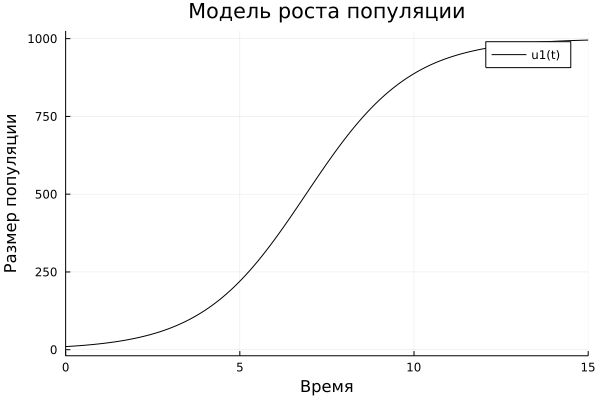

In [43]:
plot(solution, color="black", ls = [:solid :dash], title="Модель роста популяции",
xaxis="Время",yaxis="Размер популяции")

In [44]:
n = 15.0
maxy = maximum(solution.u)

995.4485622965689

┌ Info: Saved animation to 
│   fn = C:\Users\khokh\Desktop\2021-2022\COMPRACT\population.gif
└ @ Plots C:\Users\khokh\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\khokh\\Desktop\\2021-2022\\COMPRACT\\population.gif")
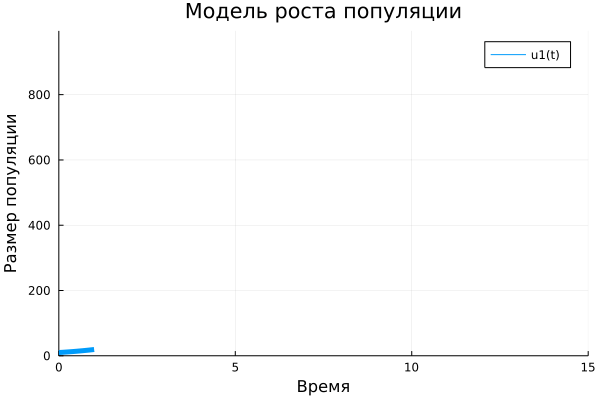

In [45]:
#анимация графика
animation = @animate for i in 1:0.1:n
    tspan = (0.0,i)
    
    prob = ODEProblem(f,x0, tspan)
    solution = solve(prob)
    
    plot(solution, linewidth = 5,
         title="Модель роста популяции",
         xaxis="Время",
         yaxis="Размер популяции",
         xlims = (0, n),
         ylims = (0, maxy)
    )
end

gif(animation, "population.gif")

3. Реализовать и проанализировать модель эпидемии Кермака–Маккендрика (SIRмодель):
$$\large{\begin{cases} \dot{s} = -\beta is,  \\ \dot{i} = \beta is - vi, \\ \dot{r} = vi, \end{cases}}$$
где $s(t)$ — численность восприимчивых к болезни индивидов в момент времени
$t, i(t)$ — численность инфицированных индивидов в момент времени $t, r(t)$ —
численность переболевших индивидов в момент времени $t, \beta$ — коэффициент интенсивности контактов индивидов с последующим инфицированием, $v$ — коэффициент
интенсивности выздоровления инфицированных индивидов. Численность популяции
считается постоянной, т.е. ̇$\dot{s} + \dot{i}+ \dot{r}= 0$. Начальные данные и параметры задать
самостоятельно и пояснить их выбор. Построить соответствующие графики (в том
числе с анимацией).

In [63]:
n = 1000
i = 250
r = 500
s = n - i - r
u0 = [s, i, r]
 function sir!(du, u, p,t)
     β,v = p
    du[1] = -β*u[2]*u[1]
    du[2] = β*u[2]*u[1] - v*u[2]
    du[3] = v*u[2]
end

#начальное значение парметров (β, v)
     p = (0.0007,0.05)

#интервал по времени
l = 150
tspan = (0.0,150)

#решение 
prob = ODEProblem(sir!,u0,tspan,p)
solution = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 23-element Vector{Float64}:
   0.0
   0.15157177709978914
   1.0237668890139866
   2.512481648165836
   4.39038774242009
   6.888220070520932
   9.185644882211896
  11.95918055721646
  14.931388068945298
  18.426201677065837
  22.461069233871378
  27.445656359436136
  34.922227032045384
  41.26356538574095
  50.06728710610451
  59.27427970298378
  71.02011587403757
  83.44873875345064
  97.0212256728175
 111.2116721578106
 126.1151074642587
 141.49868372647484
 150.0
u: 23-element Vector{Vector{Float64}}:
 [250.0, 250.0, 500.0]
 [243.39512039329315, 254.69239494988284, 501.912484656824]
 [206.72040731120748, 279.7014694281271, 513.5781232606654]
 [151.648343559913, 312.6447573818339, 535.706899058253]
 [98.85686357346303, 334.8725974165654, 566.2705390099716]
 [54.746189327776655, 336.77249372783024, 608.4813169443931]
 [32.199714258231786, 321.40890

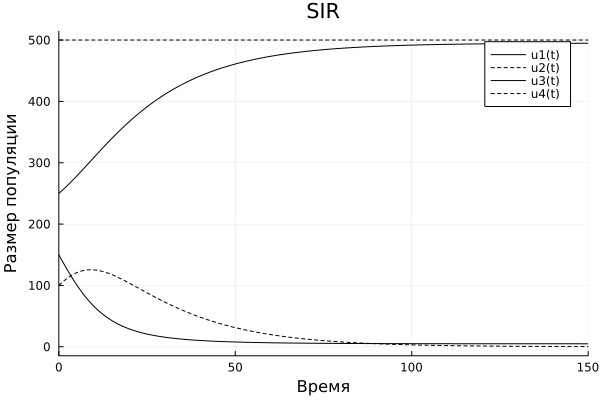

In [66]:
plot(solution, color="black", ls = [:solid :dash], title="SIR",
xaxis="Время",yaxis="Размер популяции")

┌ Info: Saved animation to 
│   fn = C:\Users\khokh\Desktop\2021-2022\COMPRACT\SIR.gif
└ @ Plots C:\Users\khokh\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\khokh\\Desktop\\2021-2022\\COMPRACT\\SIR.gif")
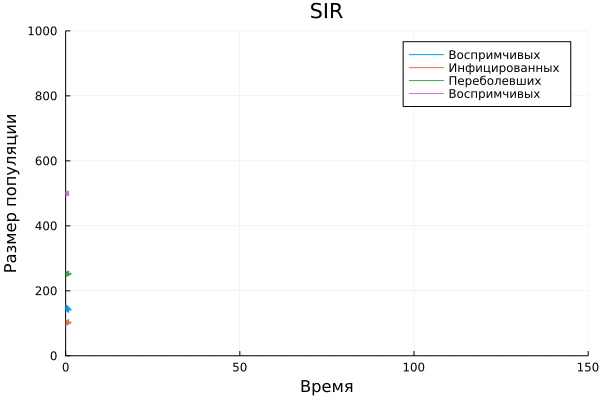

In [69]:
#анимация графика
animation = @animate for i in 1:0.1:l
    tspan = (0.0,i)
    
    prob = ODEProblem(sir!,u0, tspan,p)
    solution = solve(prob)
    
    plot(solution, linewidth = 5,
         title="SIR",
         xaxis="Время",
         yaxis="Размер популяции",
         label = ["Воспримчивых" "Инфицированных" "Переболевших"],
         xlims = (0, l),
         ylims = (0, 1000)
    )
end

gif(animation, "SIR.gif")

4. Как расширение модели SIR (Susceptible-Infected-Removed) по результатом эпидемии
испанки была предложена модель SEIR (Susceptible-Exposed-Infected-Removed):
$$ \large{\begin{cases} \dot{s}(t) = -\frac{\beta}{N}s(t)i(t),  \\ \dot{e}(t) = \frac{\beta}{N}s(t)i(t) - \delta e(t), \\ \dot{i}(t) = \delta e(t) - \gamma i(t), \\ \dot{r}(t) = \gamma i(t). \end{cases}} $$

Размер популяции сохраняется:
$$ \large{s(t) + e(t) + i(t) + r(t) = N} $$
Исследуйте, сравните с SIR.

In [83]:
n = 1000
i = 150
r = 300
e = 100
s = n - i - r - e
u0 = [s, e, i, r]
 function sier!(du, u, p,t)
     β,δ,γ, N = p
    du[1] = -β/N*u[1]*u[3]
    du[2] = β/N*u[1]*u[3] - δ*u[2]
    du[3] = δ*u[2] - γ*u[3]
    du[4] = γ*u[3]
end

#начальное значение парметров (β, δ, γ, N)
     p = (0.0007,0.05,0.1, 1000)

#интервал по времени
l = 150
tspan = (0.0,150)

#решение 
prob = ODEProblem(sir!,u0,tspan,p)
solution = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 23-element Vector{Float64}:
   0.0
   0.14859039823189907
   1.0572079008948936
   2.7033163931566895
   5.048948036829159
   7.182235762585149
   9.97309104567825
  13.220071980354898
  16.047275263038653
  19.488441267609453
  23.126604607662518
  27.516666316856117
  32.79009555743726
  42.09417372893852
  48.21535979742733
  58.42983635929759
  68.01241012212532
  80.99051823379203
  93.87076255487494
 108.24707445612509
 123.00152470168001
 138.56012863739895
 150.0
u: 23-element Vector{Vector{Float64}}:
 [450.0, 100.0, 150.0, 300.0]
 [445.251651873866, 103.99063736830264, 150.75771075783132, 300.0]
 [413.3232860272596, 130.6040339073208, 156.07268006541955, 300.0]
 [344.57693387873184, 186.35662177631744, 169.06644434495067, 300.0]
 [237.1061252608665, 267.1269283974372, 195.76694634169624, 300.0]
 [152.39657188027573, 320.2635796381263, 227.33

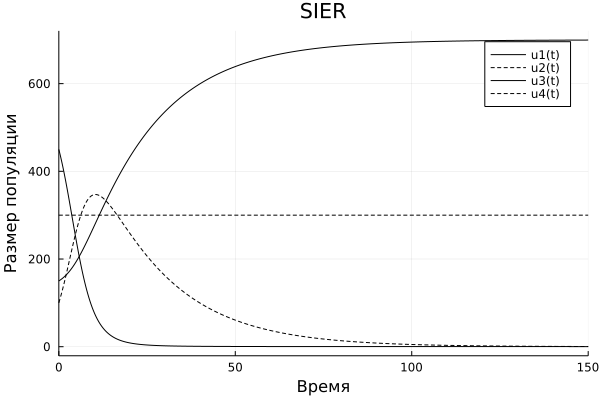

In [84]:
plot(solution, color="black", ls = [:solid :dash], title="SIER",
xaxis="Время",yaxis="Размер популяции")

┌ Info: Saved animation to 
│   fn = C:\Users\khokh\Desktop\2021-2022\COMPRACT\SIER.gif
└ @ Plots C:\Users\khokh\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\khokh\\Desktop\\2021-2022\\COMPRACT\\SIER.gif")
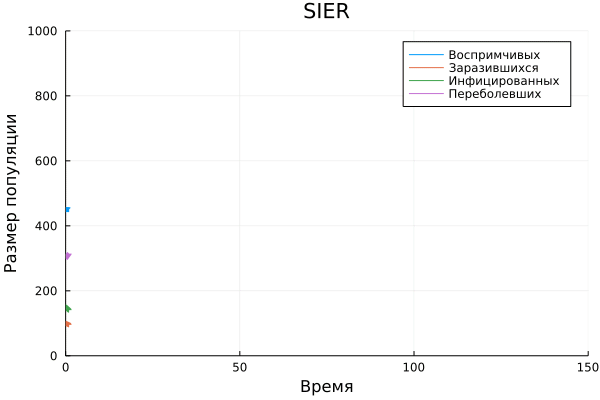

In [85]:
#анимация графика
animation = @animate for i in 1:0.2:150
    tspan = (0.0,i)
    
    prob = ODEProblem(sier!,u0, tspan,p)
    solution = solve(prob)
    
    plot(solution, linewidth = 5,
         title="SIER",
         xaxis="Время",
         yaxis="Размер популяции",
         label = ["Воспримчивых" "Заразившихся" "Инфицированных" "Переболевших"],
         xlims = (0, l),
         ylims = (0, 1000)
    )
end

gif(animation, "SIER.gif")

5. Для дискретной модели Лотки–Вольтерры:
$$ \large{\begin{cases} X_1(t+1) = aX_1(t)(1-X_1(t)) - X_1(t)X_2(t),  \\ 
X_2(t+1) = -cX_2(t) + dX_1(t)X_2(t). \end{cases}} $$

с начальными данными $a$ = 2, $c$ = 1, $d$ = 5 найдите точку равновесия. Получите
и сравните аналитическое и численное решения. Численное решение изобразите на
фазовом портрете.

In [86]:
# задаю знанчения параметров:
a = 2
c = 1
d = 5

# описание модели
DiscretLV(x1, x2) = [a*x1*(1-x1) - x1*x2, -c*x2 + d*x1*x2]

# задаем начальное условие:
u0 = [1.0,1.0]


# Задаем временя:

t =100

# Решение:
x = [[] for _ in 1:t]
x[1] = u0
for i in 1:t-1
    x[i+1] = DiscretLV(x[i]...)
end

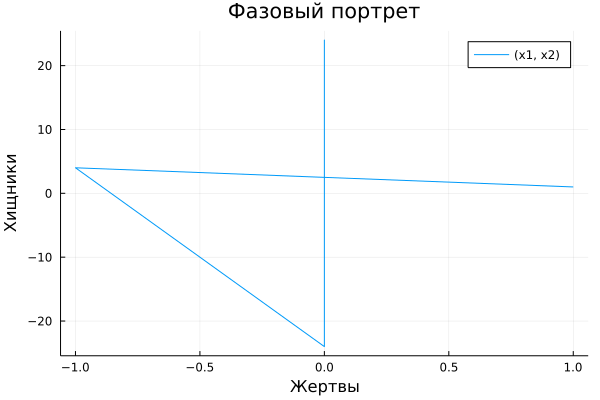

In [87]:
# Фазовый портрет:
plot( first.(x), last.(x), vars=(1,2),
    title="Фазовый портрет",
    label = "(x1, x2)",
    xaxis="Жертвы",
    yaxis="Хищники",    
)


6. Реализовать на языке Julia модель отбора на основе конкурентных отношений:
$$ \large{\begin{cases} \dot{x} = \alpha x - \beta xy,  \\ 
\dot{y} = \alpha y - \beta xy. \end{cases}} $$
Начальные данные и параметры задать самостоятельно и пояснить их выбор. Построить соответствующие графики (в том числе с анимацией) и фазовый портрет.

In [88]:
function otbor!(du, u, p, t)
    α,β = p
    du[1] = α*u[1] - β*u[2]
    du[2] = α*u[2] -β*u[1]*u[2]
end

otbor! (generic function with 1 method)

In [105]:
u0 = [31,12]

p = (0.009, 0.05)

l= 100
tspan = (0.0, l)

#решение 
prob = ODEProblem(otbor!,u0,tspan,p)
solution = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 90-element Vector{Float64}:
   0.0
   0.09003380885721105
   0.2711257987171477
   0.49310510575002514
   0.7637829046091139
   1.0748104037489679
   1.4253559046850328
   1.808684106634597
   2.2209818182002157
   2.656888610687484
   3.11245547316499
   3.5837438694131065
   4.067748334955289
   ⋮
  89.80954885103853
  90.82681514091935
  91.83484571896884
  92.83380677652669
  93.82386016319472
  94.80516330816437
  95.77786952941477
  96.7421282042151
  97.69808480799111
  98.6458812016051
  99.58565541393243
 100.0
u: 90-element Vector{Vector{Float64}}:
 [31.0, 12.0]
 [30.974667405899954, 10.446052819601247]
 [30.94257426243546, 7.905458469422571]
 [30.930040671510355, 5.619338459261545]
 [30.943189966737993, 3.7061273880078955]
 [30.984055965340534, 2.2962814118244363]
 [31.050813815034303, 1.337531815143164]
 [31.138740843230053, 0.73958333119

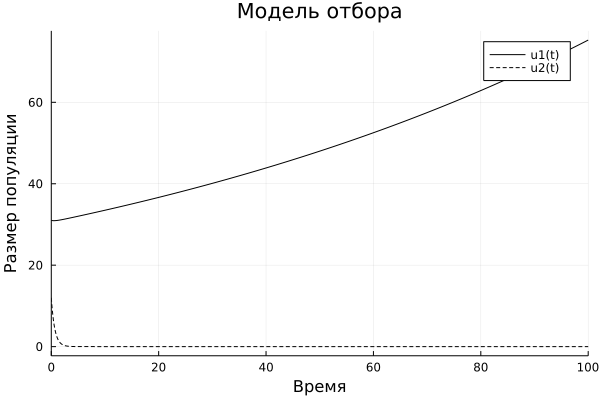

In [106]:
plot(solution, color="black", ls = [:solid :dash], title="Модель отбора",
xaxis="Время",yaxis="Размер популяции")

┌ Info: Saved animation to 
│   fn = C:\Users\khokh\Desktop\2021-2022\COMPRACT\otbor.gif
└ @ Plots C:\Users\khokh\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\khokh\\Desktop\\2021-2022\\COMPRACT\\otbor.gif")
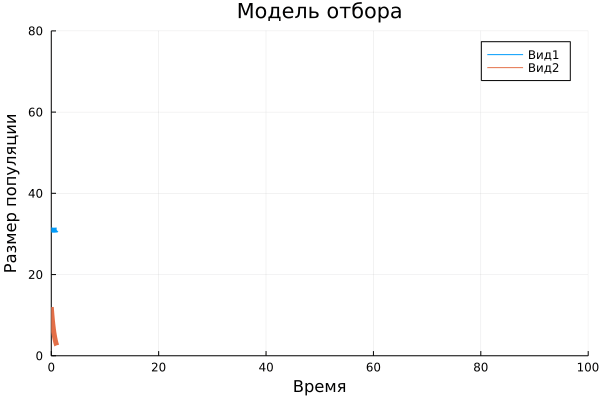

In [109]:
#анимация графика
animation = @animate for i in 1:0.2:l
    tspan = (0.0,i)
    
    prob = ODEProblem(otbor!,u0, tspan,p)
    solution = solve(prob)
    
    plot(solution, linewidth = 5,
         title="Модель отбора",
         xaxis="Время",
         yaxis="Размер популяции",
         label = ["Вид1" "Вид2"],
         xlims = (0, l),
         ylims = (0, 80)
    )
end

gif(animation, "otbor.gif")

7. Реализовать на языке Julia модель консервативного гармонического осциллятора
$$ \large{\ddot{x}+\omega_{0}^{2}x = 0, x(t_0) = x_0, \dot{x}(t) = y_0,} $$
где $\omega_{0}$ — циклическая частота. Начальные параметры подобрать самостоятельно,
выбор пояснить. Построить соответствующие графики (в том числе с анимацией)
и фазовый портрет.

In [111]:
# задаем описание модели:
ho! = @ode_def harmOscil begin
dx = y
dy = -w0^2*x
end w0


(::harmOscil{var"###ParameterizedDiffEqFunction#16081", var"###ParameterizedTGradFunction#16082", var"###ParameterizedJacobianFunction#16083", Nothing, Nothing, ODESystem}) (generic function with 1 method)

In [114]:
u0 = [1.0, 1.0]

p = (2)

tspan = (0.0,15)
l = 15

#решение 
prob = ODEProblem(ho!,u0,tspan,p)
solution = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 42-element Vector{Float64}:
  0.0
  0.07580097943195412
  0.2069885812216689
  0.35309669557584694
  0.5285194634228536
  0.7514913983307518
  1.007208076437168
  1.2779918739701663
  1.5687718429414093
  1.902676294968318
  2.2229735628434524
  2.5850538597753427
  2.952699559134839
  ⋮
 10.373038817645261
 10.818504694499907
 11.228767746831098
 11.670237731767934
 12.088956479061615
 12.521440727181613
 12.949499785046706
 13.36709737973116
 13.804879687653477
 14.204143836225626
 14.650787866182478
 15.0
u: 42-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0640413705392677, 0.6864865930281919]
 [1.1166550813709244, 0.11102078370062086]
 [1.085308739679719, -0.5370470078797775]
 [0.9269048870800589, -1.2503554234259175]
 [0.5666113099065998, -1.9276424532442606]
 [0.022386871181483317, -2.2356196749289583]
 [-0.5570282018202982, -1.9387834672777

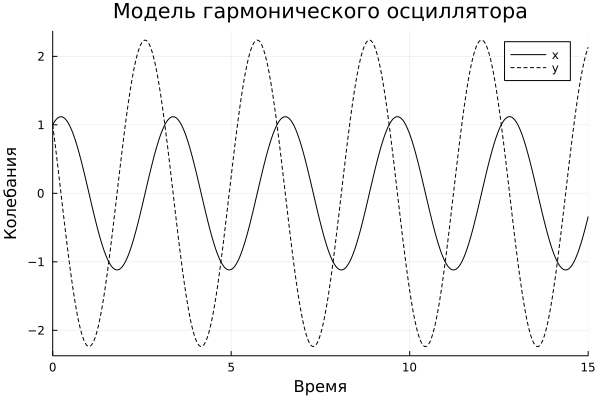

In [115]:
plot(solution, color="black", ls = [:solid :dash], title="Модель гармонического осциллятора",
xaxis="Время",yaxis="Колебания")

┌ Info: Saved animation to 
│   fn = C:\Users\khokh\Desktop\2021-2022\COMPRACT\MHO.gif
└ @ Plots C:\Users\khokh\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\khokh\\Desktop\\2021-2022\\COMPRACT\\MHO.gif")
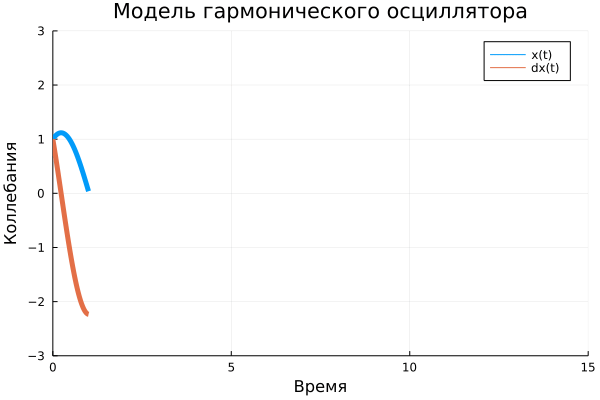

In [118]:
#анимация графика
animation = @animate for i in 1:0.2:l
    tspan = (0.0,i)
    
    prob = ODEProblem(ho!,u0, tspan,p)
    solution = solve(prob)
    
    plot(solution, linewidth = 5,
         title="Модель гармонического осциллятора",
         xaxis="Время",
         yaxis="Коллебания",
         label = ["x(t)" "dx(t)"],
         xlims = (0, l),
         ylims = (-3, 3)
    )
end

gif(animation, "MHO.gif")

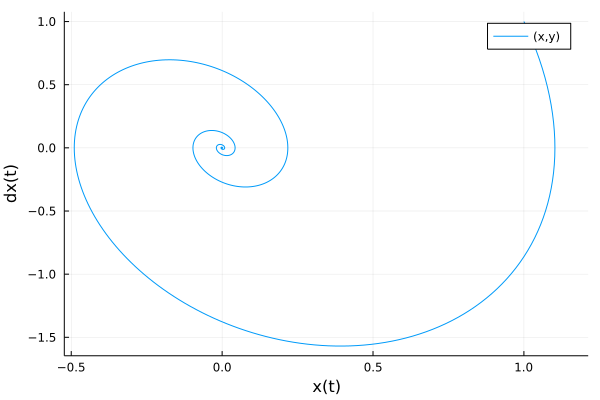

In [126]:
plot(solution,vars=(1,2),xaxis="x(t)",yaxis="dx(t)")

8. Реализовать на языке Julia модель свободных колебаний гармонического осциллятора
$$ \large{\ddot{x}+2\gamma \dot{x}+\omega_{0}^{2}x = 0, x(t_0) = x_0, \dot{x}(t) = y_0,} $$
где $\omega_{0}$ — циклическая частота, $\gamma$ — параметр, характеризующий потери энергии. Начальные параметры подобрать самостоятельно,
выбор пояснить. Построить соответствующие графики (в том числе с анимацией)
и фазовый портрет.

In [121]:
# задаем описание модели:
ho! = @ode_def harmOscil begin
dx = y
dy = -w0^2*x - 2*γ*y
end w0 γ

u0 = [1.0, 1.0]

p = (2, 0.5)

tspan = (0.0,15)
l = 15

#решение 
prob = ODEProblem(ho!,u0,tspan,p)
solution = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 43-element Vector{Float64}:
  0.0
  0.07739136029801151
  0.21052965746645613
  0.3606621429819527
  0.5585640186512095
  0.7954151451628334
  1.056090717494893
  1.3339963811029847
  1.6218640760806584
  1.9568172080863742
  2.2705567323244518
  2.6512780248001233
  3.0065549967459972
  ⋮
 10.593421994249027
 11.044310281121291
 11.438085582587378
 11.875740711671877
 12.279967579500827
 12.734638347132574
 13.142156217761773
 13.585852931117127
 14.022217844234083
 14.484487190622819
 14.928042669017568
 15.0
u: 43-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0625229097788327, 0.6174701934250618]
 [1.1027480767751034, -0.0029855227553473576]
 [1.055374635928591, -0.6081722332128747]
 [0.8725230711281384, -1.1960734424288013]
 [0.540652916136669, -1.540053419227767]
 [0.13703397206470455, -1.488530677812323]
 [-0.22469417870636346, -1.0671349598

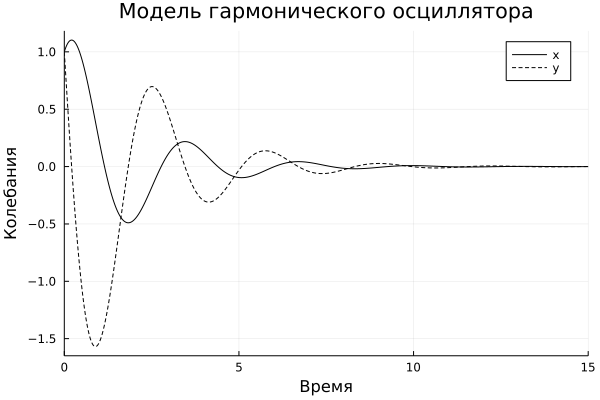

In [122]:
plot(solution, color="black", ls = [:solid :dash], title="Модель гармонического осциллятора",
xaxis="Время",yaxis="Колебания")

┌ Info: Saved animation to 
│   fn = C:\Users\khokh\Desktop\2021-2022\COMPRACT\MHO.gif
└ @ Plots C:\Users\khokh\.julia\packages\Plots\PomtQ\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\khokh\\Desktop\\2021-2022\\COMPRACT\\MHO.gif")
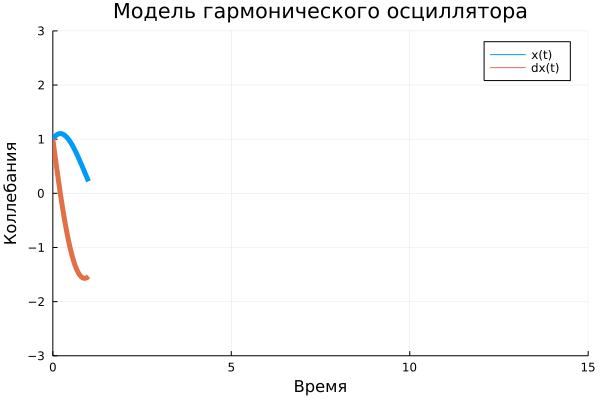

In [123]:
#анимация графика
animation = @animate for i in 1:0.2:l
    tspan = (0.0,i)
    
    prob = ODEProblem(ho!,u0, tspan,p)
    solution = solve(prob)
    
    plot(solution, linewidth = 5,
         title="Модель гармонического осциллятора",
         xaxis="Время",
         yaxis="Коллебания",
         label = ["x(t)" "dx(t)"],
         xlims = (0, l),
         ylims = (-3, 3)
    )
end

gif(animation, "MHO.gif")

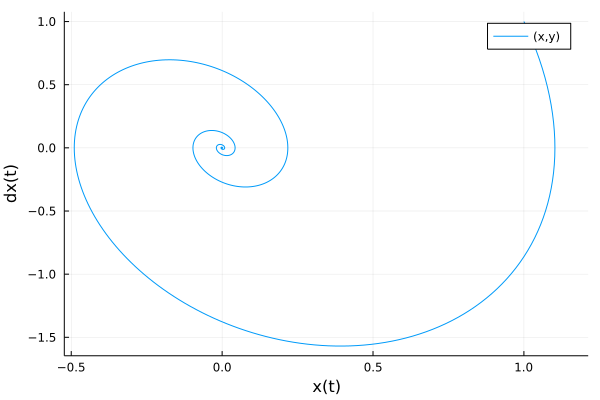

In [125]:
plot(solution,vars=(1,2),xaxis="x(t)",yaxis="dx(t)")